In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(ggplot2)
library(data.table)

R[write to console]: data.table 1.17.0 usando 5 hilos (ver ?getDTthreads).  
R[write to console]: Últimas novedades: r-datatable.com

R[write to console]: **********
Ejecutando data.table en Español. El soporte del paquete está disponible solo en inglés. Cuando busque ayuda en línea, asegúrese de comprobar también el mensaje de error en inglés, examinando los archivos po/R-<locale>.po y po/<locale>.po en el código fuente del paquete. Allí se encuentran los mensajes de error en el idioma nativo y en inglés uno al lado del otro. You can also try calling Sys.setLanguage('en') prior to reproducing the error message.
**********



In [4]:
%%R


rhesus    <- fread("../Data/rhesus_plot_data_new.tsv")
chimp     <- fread("../Data/Chimp_plot_data.tsv")
orangutan <- fread("../Data/orangutan_plot_data.tsv")

human[, species := "Human"]
rhesus[, species := "Macaque"]
chimp[, species := "Chimp"]
orangutan[, species := "Orangutan"]


all_data <- rbind( rhesus, chimp, orangutan)

all_data[, adj_p_val := p.adjust(P_Value, method = "bonferroni")]

all_data[, significance := cut(adj_p_val,
                                 breaks = c(0, 0.001, 0.01, 0.05, 1),
                                 labels = c("***", "**", "*", "ns"))]


all_data[, Dist_threshold := factor(Dist_threshold,
                                     levels = c("No filter", "10000", "5000", "1000"))]

all_data[, species := factor(species, levels = rev(c("Macaque", "Orangutan", "Chimp"))) ]

        Type Dist_threshold Odds_Ratio      P_Value   species    adj_p_val
      <char>         <fctr>      <num>        <num>    <fctr>        <num>
 1:   Direct      No filter  1.1935378 5.081926e-02   Macaque 1.000000e+00
 2:   Direct          10000  1.1263307 2.253250e-01   Macaque 1.000000e+00
 3:   Direct           5000  1.0313933 7.823956e-01   Macaque 1.000000e+00
 4:   Direct           1000  1.2817159 4.637755e-01   Macaque 1.000000e+00
 5: Inverted      No filter  1.7777871 5.034755e-10   Macaque 1.208341e-08
 6: Inverted          10000  1.7417710 4.114588e-08   Macaque 9.875010e-07
 7: Inverted           5000  1.8158337 5.709927e-08   Macaque 1.370382e-06
 8: Inverted           1000  2.6628725 2.134374e-03   Macaque 5.122496e-02
 9:   Direct      No filter  0.9616254 6.691538e-01     Chimp 1.000000e+00
10:   Direct          10000  0.9566292 6.055331e-01     Chimp 1.000000e+00
11:   Direct           5000  0.9647132 7.314214e-01     Chimp 1.000000e+00
12:   Direct           10

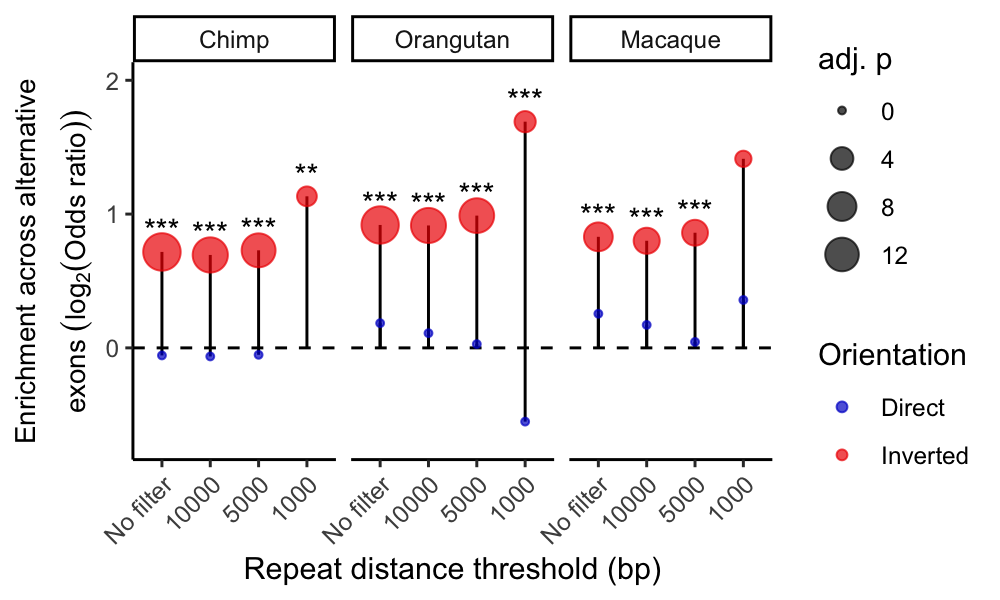

In [7]:
%%R -w 5 -h 3 --units in -r 200

Fig2A <- ggplot(all_data, aes(x = Dist_threshold, y = log2(Odds_Ratio))) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black", size = 0.5) +
  geom_segment(aes(x = Dist_threshold, xend = Dist_threshold, 
                   y = 0, yend = log2(Odds_Ratio)),
               color = "black", size = 0.5) +
  geom_point(aes(colour = Type, size = -log10(adj_p_val)), alpha = 0.7) +
  geom_text(data = subset(all_data, significance != "ns"),
            aes(label = significance),
            vjust = -0.5) +
  facet_grid( . ~ species ) +
  xlab("Repeat distance threshold (bp)") +
#   ylab(expression(atop("Ratio of alternative over constitutive", 
#                        "exon " * (log[2]("Odds ratio") ) )) ) +
  ylab(expression(atop("Enrichment across alternative", 
                       "exons " * (log[2]("Odds ratio") ) )) ) +
  ylim(c(-0.7, 2)) +
  scale_colour_manual(name = "Orientation",
                      values = c("Direct" = "blue3", "Inverted" = "red2")) +
  scale_size_continuous(name = "adj. p") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5),
        axis.title.y = element_text(size = 10), axis.text.x = element_text(angle = 45, hjust=1))

Fig2A